In [1]:
import os
%run affine.py
from osgeo import gdal, osr

In [3]:
rng = np.random.default_rng(999)

px = rng.uniform(0, 799, size = 4)
py = rng.uniform(0, 599, size = 4)

X = rng.uniform(140, 150, size = 4)
Y = rng.uniform(15, 20, size = 4)

gcps_lst = list(zip(X, Y, px, py))

In [4]:
gcps_lst

[(np.float64(149.1094311969085),
  np.float64(17.564646767351825),
  np.float64(622.2811890466377),
  np.float64(102.49433703793743)),
 (np.float64(141.90773272559804),
  np.float64(18.19144038171389),
  np.float64(137.6266560291843),
  np.float64(540.2528119295063)),
 (np.float64(145.57399902035402),
  np.float64(17.41234388683788),
  np.float64(570.1446619661385),
  np.float64(84.92714352482984)),
 (np.float64(146.12063681237203),
  np.float64(16.444029815693412),
  np.float64(599.5177271454444),
  np.float64(366.1259940916348))]

In [5]:
width = 800
height = 600

driver = gdal.GetDriverByName("GTiff")
ds = driver.Create(
    "/mnt/c/Users/nzhihao/Desktop/test/test_with_gcps.tif",
    width,
    height,
    1,
    gdal.GDT_Float64
)

band = ds.GetRasterBand(1)
band.WriteArray(np.random.uniform(low = 0, high = 1, size = (height, width)))
band.FlushCache()

band = None
ds = None

/home/nzhihao/miniforge3/envs/alvin/lib/python3.14/site-packages/osgeo/gdal.py:606: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [7]:
# do in bash
# gdal_translate -a_srs EPSG:4326 -of GTiff -co BIGTIFF=YES -co TILED=YES -r cubic -gcp 622.281189046638 102.494337037937 149.1094311969085 17.564646767351825 -gcp 137.6266560291843 540.252811929506 141.90773272559804 18.19144038171389 -gcp 570.144661966139 84.9271435248298 145.57399902035402 17.41234388683788 -gcp 599.517727145444 366.125994091635 146.12063681237203 16.444029815693412 test_with_gcps.tif test_with_gcps_reapplied.tif

In [8]:
# do in bash
# gdalwarp -t_srs EPSG:4326 -co BIGTIFF=YES -ot UInt16 -te 140 15 150 20 test_with_gcps_reapplied.tif warp_test.tif

In [9]:
ds_warp = gdal.Open("/mnt/c/Users/nzhihao/Desktop/test/warp_test.tif")
gt34 = ds_warp.GetGeoTransform()
gt43 = gdal.InvGeoTransform(gt34)
print(gt34)
print(gt43)

(140.0, 0.007633587786259542, 0.0, 20.0, 0.0, -0.007633587786259542)
(-18340.0, 131.0, 0.0, 2620.0, 0.0, -131.0)


In [10]:
gcps_lst_cp, E12, N12, E21, N21 = py_GCPTransformer(gcps_lst, False, dfTolerance = -1, nGCPmin = -1)
print(E12)
print(N12)

[ 1.41968768e+02  9.27451947e-03 -2.79677069e-03]
[ 2.07340472e+01 -4.92005425e-03 -3.50167909e-03]


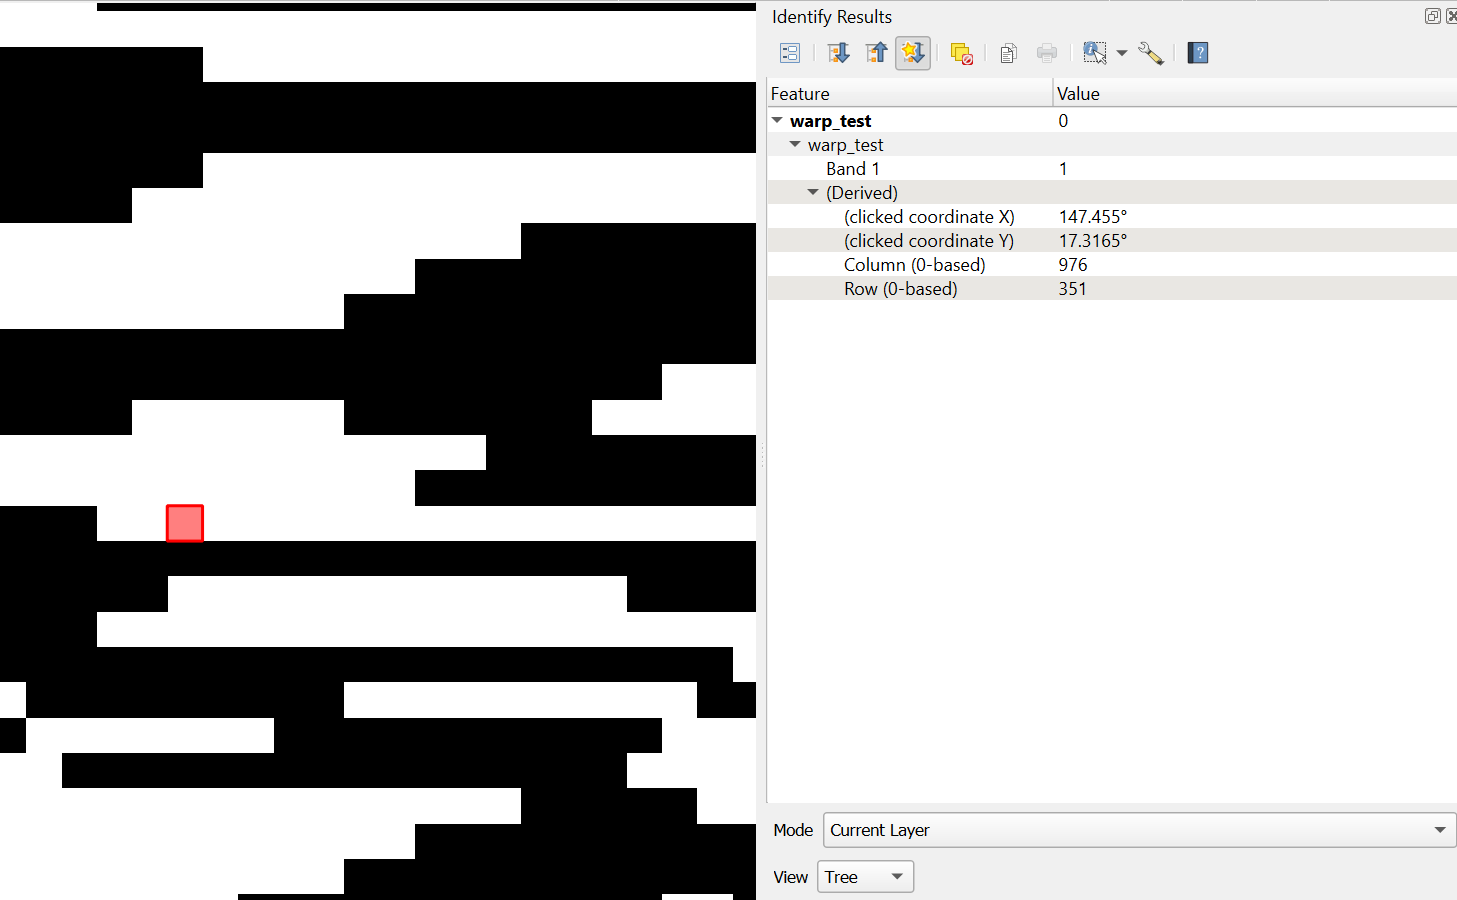